<a href="https://colab.research.google.com/github/richa11101982/-git-clone-https-github.com-android-codelab-android-kmp/blob/main/Google_ML_(EDU_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1639142447.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2023-01-01', periods=num_points, freq='H')


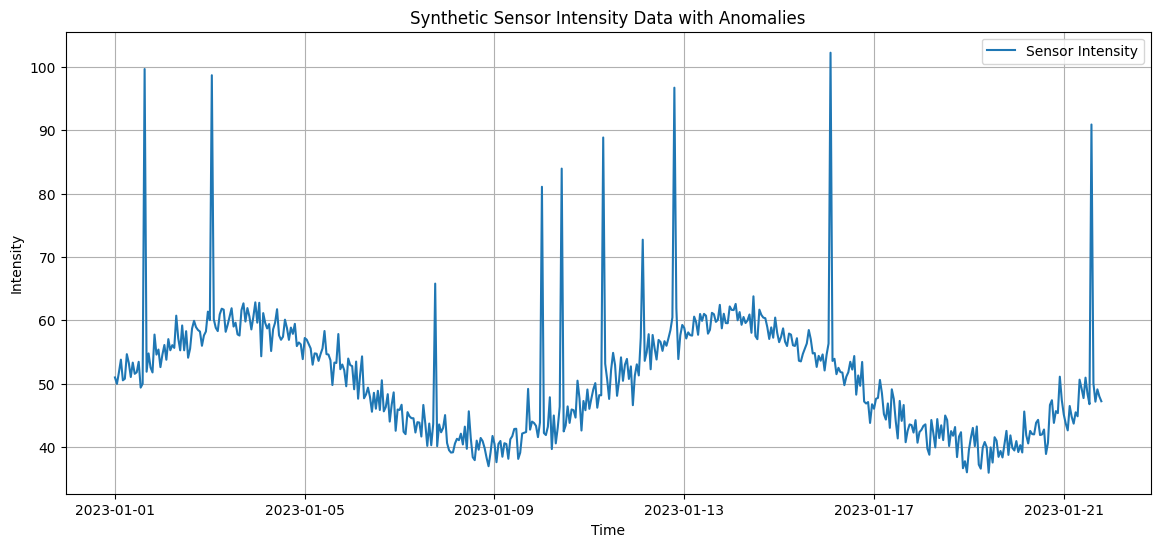

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate Synthetic Sensor Intensity Data
np.random.seed(42)
num_points = 500
timestamps = pd.date_range(start='2023-01-01', periods=num_points, freq='h')

# Normal behavior: slight sinusoidal pattern with some noise
normal_intensity = 50 + 10 * np.sin(np.linspace(0, 4 * np.pi, num_points)) + np.random.normal(0, 2, num_points)

# Introduce some anomalies (spikes)
anomaly_indices = np.random.choice(num_points, 10, replace=False)
normal_intensity[anomaly_indices] += np.random.uniform(20, 50, 10) # Add significant spikes

df = pd.DataFrame({'timestamp': timestamps, 'intensity': normal_intensity})
df = df.set_index('timestamp')

# 2. Visualize the raw data
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['intensity'], label='Sensor Intensity')
plt.title('Synthetic Sensor Intensity Data with Anomalies')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Feature Intensity in ML

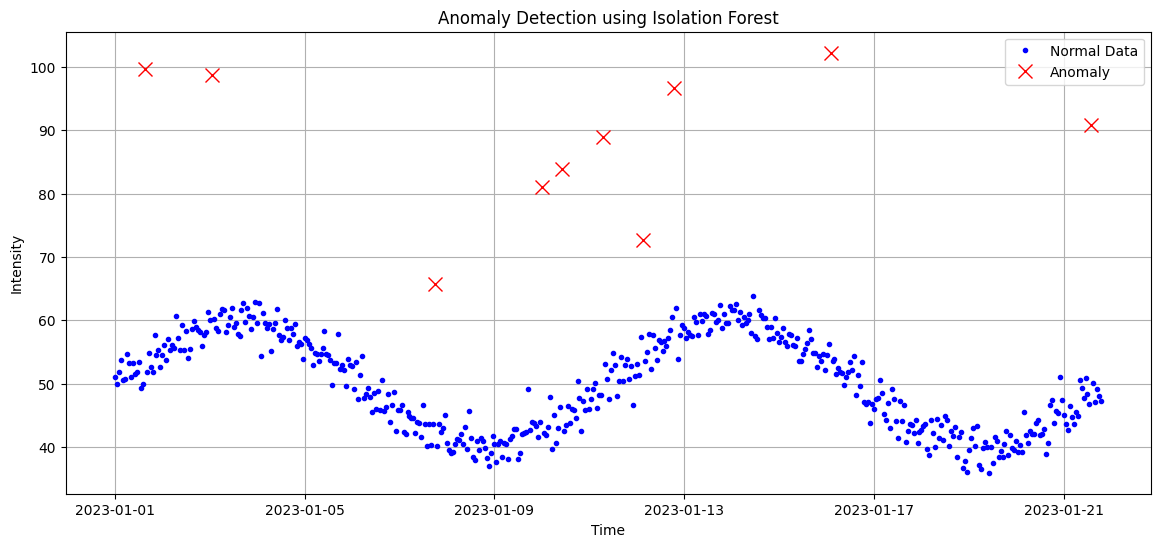

Detected 10 anomalies.
Anomaly details:


,intensity,anomaly
timestamp,,
2023-01-01 15:00:00,99.664608,-1
2023-01-03 01:00:00,98.683085,-1
2023-01-07 18:00:00,65.800878,-1
2023-01-10 00:00:00,81.081235,-1
2023-01-10 10:00:00,83.949924,-1
2023-01-11 07:00:00,88.859436,-1
2023-01-12 03:00:00,72.730447,-1
2023-01-12 19:00:00,96.718107,-1
2023-01-16 02:00:00,102.236016,-1


In [2]:
# 3. Apply Isolation Forest
# 'contamination' is the proportion of outliers in the data set.
# Adjust this parameter based on your domain knowledge or by cross-validation.
iso_forest = IsolationForest(contamination=0.02, random_state=42)
iso_forest.fit(df[['intensity']])

# Predict anomalies (-1 for outliers, 1 for inliers)
df['anomaly'] = iso_forest.predict(df[['intensity']])

# Separate normal and anomalous points for plotting
anomalies = df[df['anomaly'] == -1]
normal_data = df[df['anomaly'] == 1]

# 4. Visualize the detected anomalies
plt.figure(figsize=(14, 6))
plt.plot(normal_data.index, normal_data['intensity'], 'b.', label='Normal Data')
plt.plot(anomalies.index, anomalies['intensity'], 'rx', markersize=10, label='Anomaly')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected {len(anomalies)} anomalies.")
print("Anomaly details:")
display(anomalies)
